<a href="https://colab.research.google.com/github/pds1920/capstone-group-6/blob/master/Training/NoFish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/PDS/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
import pandas as pd
import numpy as np

In [0]:
path_img = "/content/gdrive/My Drive/train"

In [0]:
data = ImageDataBunch.from_folder(path_img, train=".",
                                  ds_tfms=get_transforms(),
                                  valid_pct=0.2,
                                  size=128,
                                  bs=32,
                                  ).normalize(imagenet_stats)

In [0]:
data.classes

['Fish', 'NoFish']

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy).mixup().load("/content/gdrive/My Drive/train/models/128_Nofish_s1")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


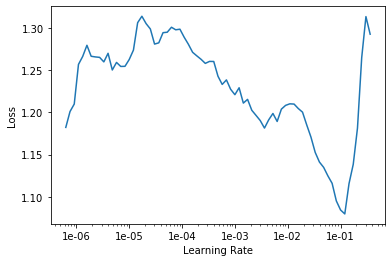

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(15, max_lr=1e-2, callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name="128_Nofish_s1")])

Better model found at epoch 0 with accuracy value: 0.8256275057792664.
Better model found at epoch 1 with accuracy value: 0.9418758153915405.
Better model found at epoch 2 with accuracy value: 0.9564068913459778.
Better model found at epoch 6 with accuracy value: 0.960369884967804.
Better model found at epoch 9 with accuracy value: 0.9696168899536133.
Better model found at epoch 12 with accuracy value: 0.9749009013175964.


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


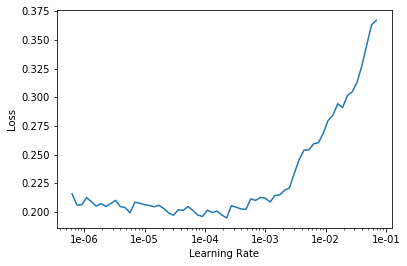

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(15, max_lr=slice(1e-5, 1e-3), callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name="128_Nofish_s2")])

Better model found at epoch 0 with accuracy value: 0.9775429368019104.
Better model found at epoch 11 with accuracy value: 0.9788639545440674.
Better model found at epoch 12 with accuracy value: 0.9801849126815796.
Better model found at epoch 13 with accuracy value: 0.9828269481658936.
Better model found at epoch 14 with accuracy value: 0.9854689836502075.


In [0]:
data = ImageDataBunch.from_folder(path_img, train=".",
                                  ds_tfms=get_transforms(),
                                  valid_pct=0.2,
                                  size=352,
                                  bs=32,
                                  ).normalize(imagenet_stats)
learn.data = data

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


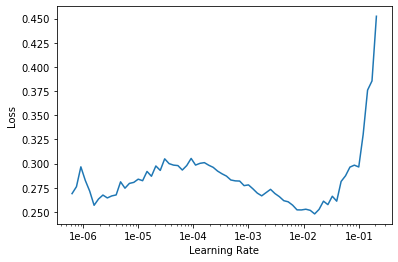

In [0]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(15, max_lr=1e-3, callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name="352_Nofish_s1")])

Better model found at epoch 0 with accuracy value: 0.9339498281478882.
Better model found at epoch 1 with accuracy value: 0.9418758153915405.
Better model found at epoch 2 with accuracy value: 0.9564068913459778.
Better model found at epoch 4 with accuracy value: 0.9616909027099609.
Better model found at epoch 6 with accuracy value: 0.9709379076957703.
Better model found at epoch 8 with accuracy value: 0.9722589254379272.
Better model found at epoch 12 with accuracy value: 0.9735799431800842.


In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


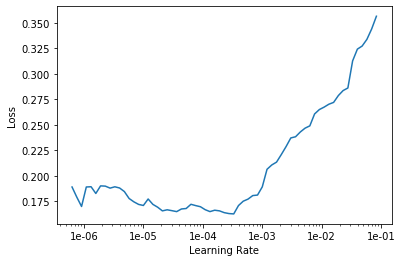

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(15, max_lr=slice(1e-5, 1e-3), callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name="352_Nofish_s2")])

Better model found at epoch 0 with accuracy value: 0.9749009013175964.


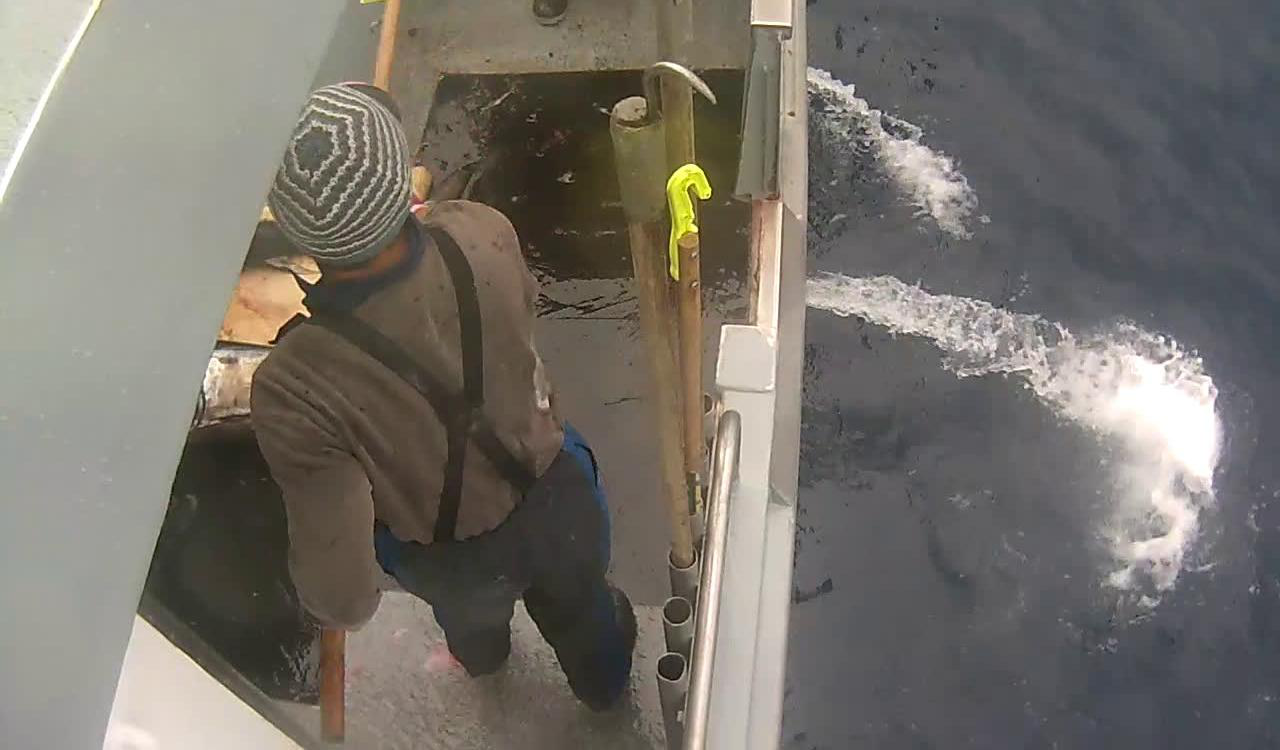

In [0]:
img = open_image("/content/gdrive/My Drive/img_00030.jpg")
img

In [0]:
learn.predict(img)

(Category NoFish, tensor(1), tensor([0.3094, 0.6906]))

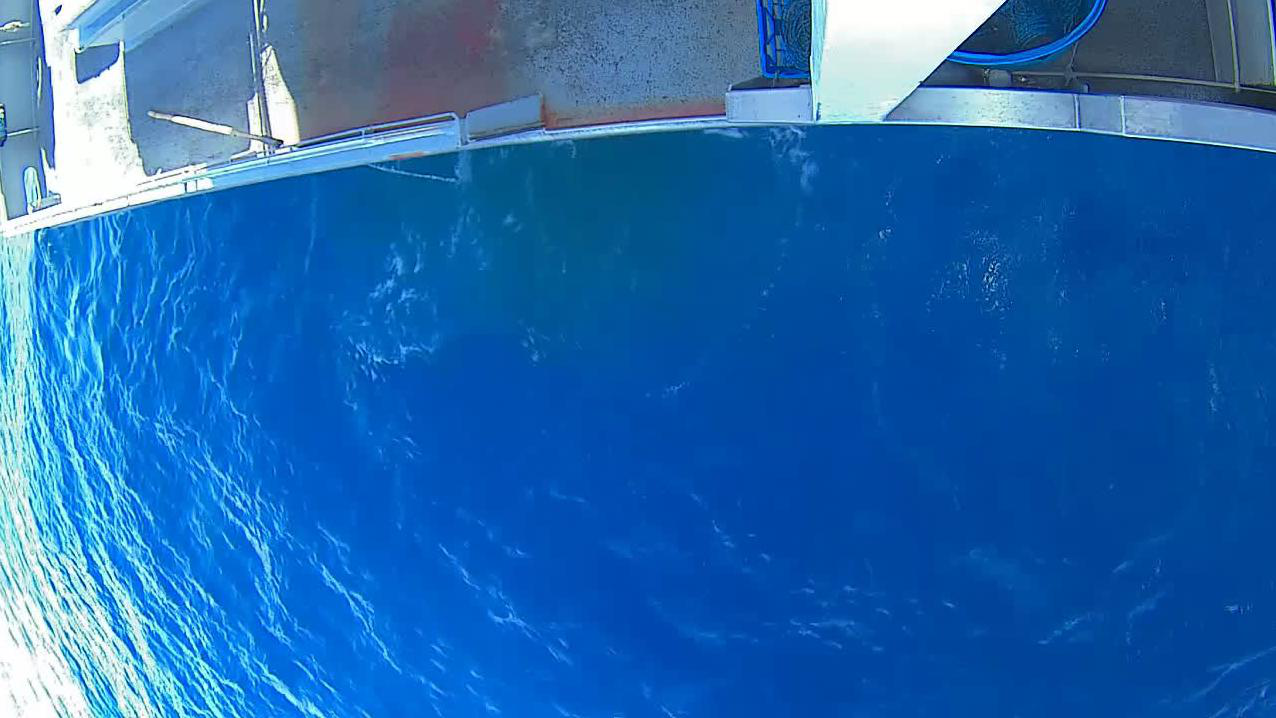

In [0]:
img2 = open_image("/content/gdrive/My Drive/img_00119.jpg")
img2

In [0]:
learn.predict(img2)

(Category Fish, tensor(0), tensor([0.8486, 0.1514]))

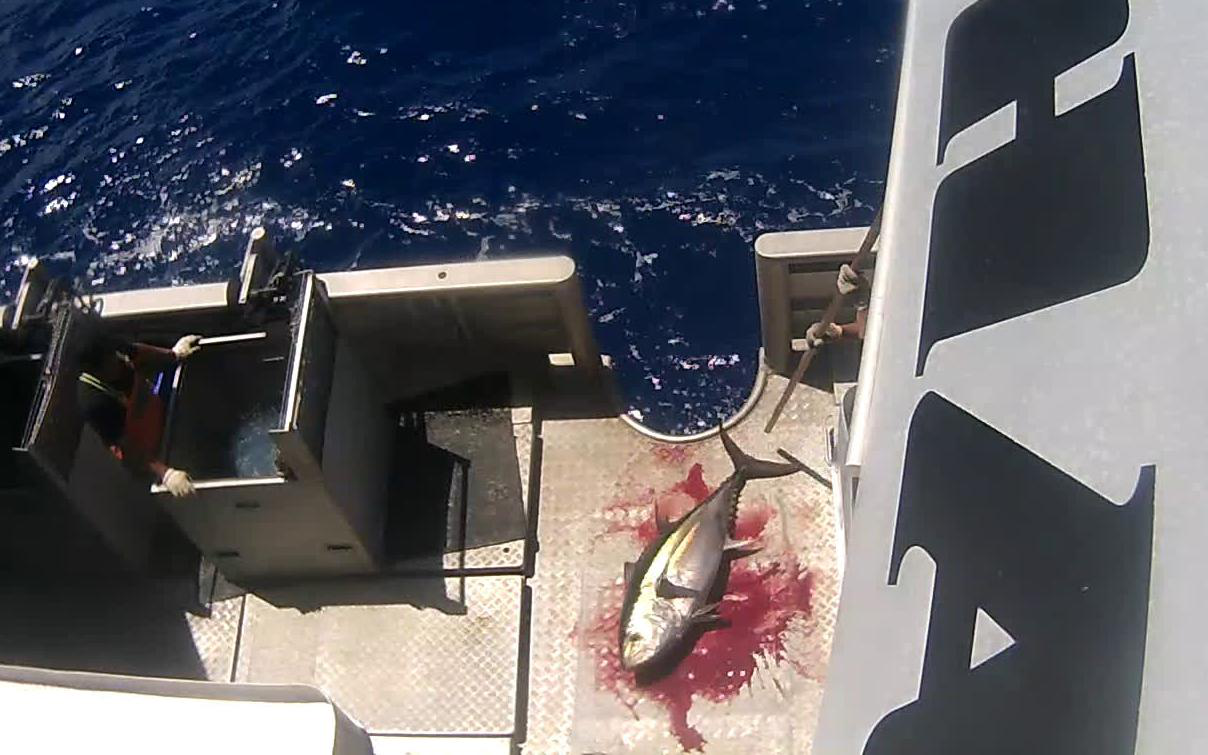

In [0]:
img3 = open_image("/content/gdrive/My Drive/image_00425.jpg")
img3

In [0]:
learn.predict(img3)

(Category Fish, tensor(0), tensor([0.9836, 0.0164]))

In [0]:
data = ImageDataBunch.from_folder(path_img, train=".",
                                  ds_tfms=get_transforms(),
                                  valid_pct=0.2,
                                  size=480,
                                  bs=32,
                                  ).normalize(imagenet_stats)

In [6]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy).mixup().load("/content/gdrive/My Drive/train/models/352_Nofish_s2")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [0]:
learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


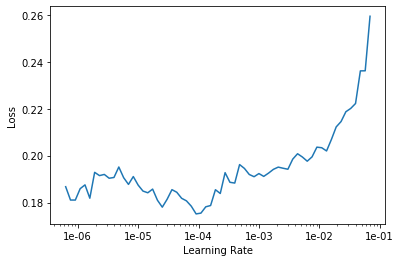

In [8]:
learn.lr_find()
learn.recorder.plot()

In [9]:
learn.fit_one_cycle(15, max_lr=1e-4, callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name="480_Nofish_s1")])

Better model found at epoch 0 with accuracy value: 0.9894737005233765.
Better model found at epoch 4 with accuracy value: 0.9907894730567932.
Better model found at epoch 7 with accuracy value: 0.99210524559021.


KeyboardInterrupt: ignored

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


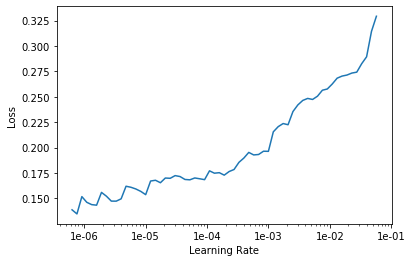

In [11]:
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(10, max_lr=slice(1e-6, 1e-4), callbacks=[SaveModelCallback(learn, every='improvement', monitor='accuracy', name="480_Nofish_s2")])

Better model found at epoch 0 with accuracy value: 0.99210524559021.


In [0]:
learn.export()

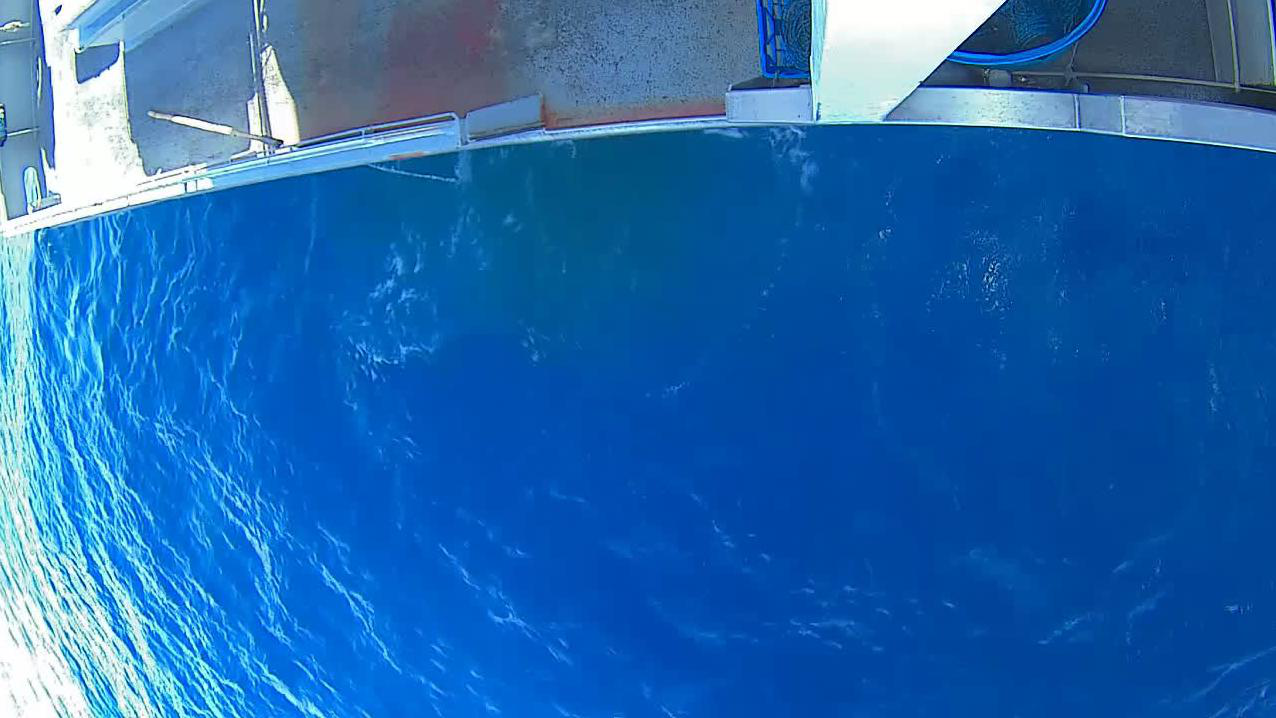

In [19]:
img2 = open_image("/content/gdrive/My Drive/Kopie von img_00119.jpg")
img2

In [16]:
learn.predict(img2)

(Category NoFish, tensor(1), tensor([0.3992, 0.6008]))

look at toplosses / etc

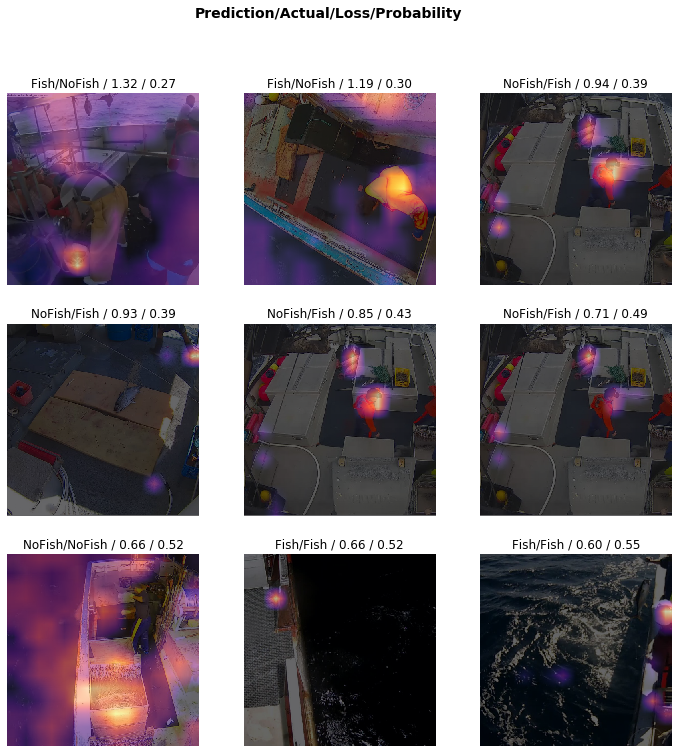

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, heatmap=True)

Focuses on people working on the boat - bad side effect

In [18]:
interp.most_confused(min_val=1)


[('Fish', 'NoFish', 4), ('NoFish', 'Fish', 2)]